In [1]:
import numpy as np
from sklearn.preprocessing import Normalizer
import cv2
import keras
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

C:\Users\rayso\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


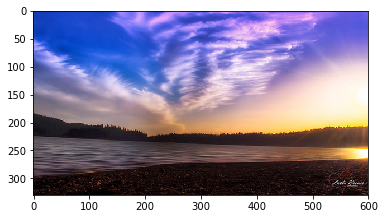

In [4]:
image = cv2.imread("data/smallsunset.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
train = image.reshape(-1,3)

In [5]:
class GaussianMixture():
    def __init__(self, k, max_iter = 10):
        self.k = k
        self.max_iter = max_iter
    def fit(self, train):
        # train in the shape of # of data points * # of feature dim
        n_samples = train.shape[0]
        feature_dim = train.shape[1]
        
        # Random initialization
        self.centers = np.random.random([self.k, feature_dim]) * np.max(train, axis =0)
        self.covs = np.random.random([self.k, feature_dim]) * np.square(np.std(train, axis =0))
        self.prior_probs = np.random.rand(self.k)
        self.prior_probs = self.prior_probs / np.sum(self.prior_probs) 
        
        # Place holder for data_probs
        data_probs = np.zeros((n_samples,self.k))
        
        for _ in range(self.max_iter):
            
            # estimate clusters using EM, refer any online Gaussian Mixture blog for below equations
            for i in range(self.k):
                data_probs[:,i] = multivariate_normal(self.centers[i], np.diag(self.covs[i])).pdf(train) * self.prior_probs[i]
            data_probs = data_probs / np.sum(data_probs, axis = 1).reshape(n_samples,1)  
            self.centers = np.dot(np.transpose(data_probs), train)/np.sum(data_probs, axis=0).reshape(self.k,1)
            self.covs = np.sum(np.repeat(data_probs[:, :, np.newaxis], feature_dim, axis=2) * 
                               np.square(np.repeat(train[:, np.newaxis, :], self.k, axis=1) - self.centers), axis =0)/np.sum(data_probs, axis=0).reshape(self.k,1)
            self.prior_probs = np.sum(data_probs, axis=0)/np.sum(data_probs)
            
    def fit_predict(self, train):
        # train in the shape of # of data points * # of feature dim
        n_samples = train.shape[0]
        feature_dim = train.shape[1]
        
        self.centers = np.random.random([self.k, feature_dim]) * np.max(train, axis =0)
        self.covs = np.random.random([self.k, feature_dim]) * np.square(np.std(train, axis =0))
        self.prior_probs = np.random.rand(self.k)
        self.prior_probs = self.prior_probs / np.sum(self.prior_probs) 
        
        data_probs = np.zeros((n_samples,self.k))
        
        for _ in range(self.max_iter):
            
            for i in range(self.k):
                data_probs[:,i] = multivariate_normal(self.centers[i], np.diag(self.covs[i])).pdf(train) * self.prior_probs[i]
            data_probs = data_probs / np.sum(data_probs, axis = 1).reshape(n_samples,1)  
            self.centers = np.dot(np.transpose(data_probs), train)/np.sum(data_probs, axis=0).reshape(self.k,1)
            self.covs = np.sum(np.repeat(data_probs[:, :, np.newaxis], feature_dim, axis=2) * 
                               np.square(np.repeat(train[:, np.newaxis, :], self.k, axis=1) - self.centers), axis =0)/np.sum(data_probs, axis=0).reshape(self.k,1)
            self.prior_probs = np.sum(data_probs, axis=0)/np.sum(data_probs)  
            
        return np.argmax(data_probs, axis=1)
        
    def predict(self, test):
        
        for i in range(self.k):
                data_probs[:,i] = multivariate_normal(self.centers[i], np.diag(self.covs[i])).pdf(test) * self.prior_probs[i]
        
        return np.argmax(data_probs, axis=1)
        
        
        

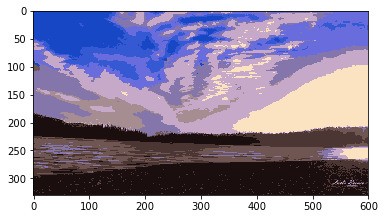

In [6]:
cluster = GaussianMixture(k=10)
cluster_indexes = cluster.fit_predict(train)
mask_img = np.array([cluster.centers[i] for i in cluster_indexes]).reshape(330,600,3)/255
plt.imshow(mask_img)
plt.show()